<a href="https://colab.research.google.com/github/karan-kumawat17/Dataset-Distillation/blob/main/Dataset_Distillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

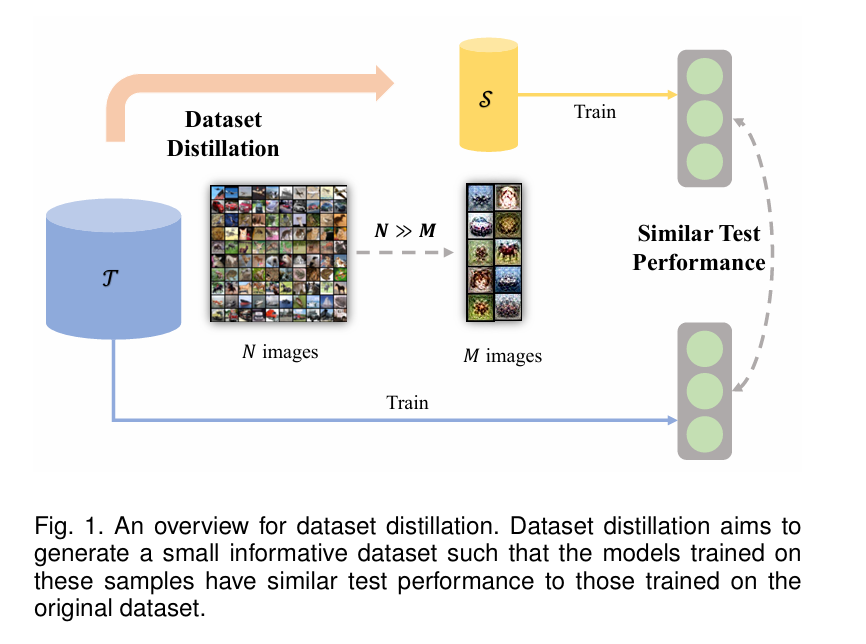

 To overcome the privacy and copyright issues, another
 line of work that focuses on generating new training data
 for compression has been proposed, known as dataset
 distillation (DD) or dataset condensation (DC).

# **Definition of Dataset Distillation**



The canonical dataset distillation problem involves learning a small set of synthetic data from an original large-scale dataset so that models trained on the synthetic dataset can perform comparably to those trained on the original. Given a real dataset consisting of $|\mathcal{T}|$ pairs of training images and corresponding labels, denoted as $\mathcal{T} = (X_t, Y_t)$, where $X_t \in \mathbb{R}^{N \times d}$, $N$ is the number of real samples, $d$ is the number of features, $Y_t \in \mathbb{R}^{N \times C}$, and $C$ is the number of output classes.

The synthetic dataset is denoted as $\mathcal{S} = (X_s, Y_s)$, where $X_s \in \mathbb{R}^{M \times D}$, $M$ is the number of synthetic samples, $Y_s \in \mathbb{R}^{M \times C}$, $M \ll N$, and $D$ is the number of features for each sample. For typical image classification tasks, $D = \text{height} \times \text{width} \times \text{channels}$, and $y$ is a one-hot vector whose dimension $C$ is the number of classes.

Formally, we formulate the problem as the following:

$\mathcal{S} = \arg\min_{\mathcal{S}} \mathcal{L}(\mathcal{S}, \mathcal{T})$,


where $\mathcal{L}$ is some objective for dataset distillation, which will be elaborated in the following contents.






\begin{algorithm}
\caption{Dataset Distillation Framework}
\begin{algorithmic}[1]
\State \textbf{Input:} Original dataset $\mathcal{T}$
\State \textbf{Output:} Synthetic dataset $\mathcal{S}$
\State Initialize $\mathcal{S}$ \Comment{Random, real, or core-set}
\While{not converge}
    \State Get a network $\theta$ \Comment{Random or from some cache}
    \State Update $\theta$ and cache it if necessary
    \Comment{Via $\mathcal{S}$ or $\mathcal{T}$, for some steps}
    \State Update $\mathcal{S}$ via $\mathcal{L}(\mathcal{S}, \mathcal{T})$
    \Comment{PerM, ParM, DisM, or their variants}
\EndWhile
\State \textbf{return} $\mathcal{S}$
\end{algorithmic}
\end{algorithm}



# **General Workflow of Dataset Distillation**

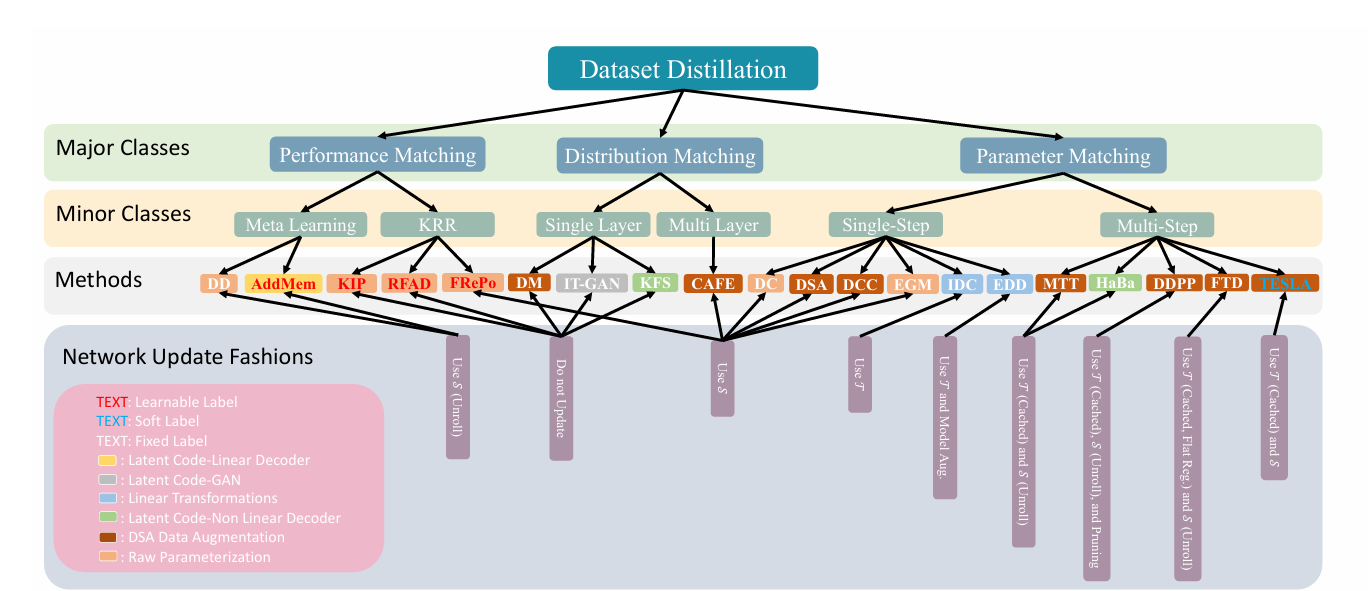

# **Performance Matching**

# **KRR using RFAD in an alternative manner**

In [1]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:           334Gi       2.6Gi       315Gi       3.0Mi        16Gi       329Gi
Swap:             0B          0B          0B


In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.5/314.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9

In [3]:
!pip install torchvision

In [4]:
!pip uninstall -y tensorflow
!pip install tensorflow-cpu

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: ke

In [5]:
!pip install cloud-tpu-client
!pip install torch-xla

In [6]:
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from datasets import load_dataset
from torchvision.transforms.functional import to_tensor, to_pil_image
from torch.utils.data import DataLoader
from scipy.ndimage import rotate as scipyrotate
from torch.nn.functional import interpolate
import joblib
import torch_xla
import torch_xla.core.xla_model as xm
import time

In [7]:
device = xm.xla_device()

In [38]:
class Data:
    def __init__(self, output_channels=3, image_size=64, batch_size=128):
        self.device = xm.xla_device()
        self.output_channels = output_channels
        self.image_size = image_size
        self.batch_size = batch_size
        self.transforms = self.setup_transforms()
        self.train_loader, self.val_loader = self.setup_data_loaders()

    def setup_transforms(self):
        transform_list = [
            transforms.Resize((self.image_size, self.image_size)),
            transforms.RandomHorizontalFlip(),
            transforms.Lambda(lambda x: x.convert('RGB')),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]
        # if self.output_channels == 1:
        #     transform_list.insert(3, transforms.Grayscale(num_output_channels=1))
        return transforms.Compose(transform_list)

    def apply_transforms(self, example):
        # Assuming 'image' is the key in the dataset dictionary that holds the image data
        example['image'] = self.transforms(example['image'])
        return example

    def setup_data_loaders(self):
        ds = load_dataset("zh-plus/tiny-imagenet")
        train_dataset = ds['train'].map(lambda example: self.apply_transforms(example))
        val_dataset = ds['valid'].map(lambda example: self.apply_transforms(example))

        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=0, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False, num_workers=0, pin_memory=True)

        return train_loader, val_loader

    def extract_images_and_labels(self, loader):
        images, labels = [], []
        for batch in loader:
            images.append(batch['image'])
            labels.append(batch['label'])
        return torch.cat(images), torch.cat(labels)

    def convert_to_tensor(self, example):
        image, label = example['image'], example['label']
        if self.transforms is not None:
            image = self.transforms(image)
        return {'image': image, 'label': label}

    def get_zca_matrix(self, images):
        flat_images = images.view(images.size(0), -1)
        sigma = torch.mm(flat_images.t(), flat_images) / flat_images.size(1)
        u, s, v = torch.svd(sigma)
        s_inv_root = torch.diag(1.0 / torch.sqrt(s + 1e-10))
        zca_matrix = u @ s_inv_root @ u.t()
        return zca_matrix

    def apply_zca(self, images, zca_matrix):
        shape = images.size()
        flat_images = images.view(shape[0], -1)
        whitened = torch.mm(flat_images, zca_matrix)
        return whitened.view(shape)

    def layernorm_data(self, X):
        mean = X.mean(dim=(1,2,3), keepdim=True)
        std = X.std(dim=(1,2,3), keepdim=True)
        return (X - mean) / (std + 1e-6)

    def transform_data(self, X, whitening_transform):
        X_flat = X.view(X.shape[0], -1)
        transformed_X = torch.matmul(X_flat, whitening_transform)
        return transformed_X.view(X.shape)

    def scale_to_zero_one(self, X):
        mins = X.view(X.shape[0], -1).min(dim=1, keepdim=True)[0]
        maxes = X.view(X.shape[0], -1).max(dim=1, keepdim=True)[0]
        return (X - mins) / (maxes - mins + 1e-6)


    def augment(self, images, dc_aug_param, device):
        device = device or self.device
        if dc_aug_param is not None and dc_aug_param['strategy'] != 'none':
            scale = dc_aug_param['scale']
            crop = dc_aug_param['crop']
            rotate = dc_aug_param['rotate']
            noise = dc_aug_param['noise']
            strategy = dc_aug_param['strategy']

            def cropfun(i):
                im_ = torch.zeros_like(images[i], device=self.device)
                r, c = np.random.randint(0, crop * 2 + 1, 2)
                im_[:, r:r + self.image_size, c:c + self.image_size] = images[i, :, :self.image_size, :self.image_size]
                return im_

            def scalefun(i):
                h = int(self.image_size * scale)
                w = int(self.image_size * scale)
                return interpolate(images[i:i+1], size=(h,w), mode='bilinear', align_corners=False)[0]

            def rotatefun(i):
                angle = np.random.uniform(-rotate, rotate)
                return transforms.functional.rotate(images[i], angle)

            def noisefun(i):
                noise_tensor = torch.randn_like(images[i]) * noise
                return images[i] + noise_tensor

            augment_funcs = {'crop': cropfun, 'scale': scalefun, 'rotate': rotatefun, 'noise': noisefun}
            for i in range(images.size[0]):
                choice = np.random.choice(strategy.split('_'))
                augment_funcs[choice](i)

        return images

In [10]:
class ParamDiffAug:
    def __init__(self):
        self.aug_mode = 'M'  # 'M' for multiple or 'S' for single
        self.prob_flip = 0.5
        self.ratio_scale = 1.2
        self.ratio_rotate = 15.0
        self.ratio_crop_pad = 0.125
        self.ratio_cutout = 0.5  # The size would be 0.5x0.5
        self.ratio_noise = 0.05
        self.brightness = 0.5
        self.saturation = 2.0
        self.contrast = 0.5
        self.Siamese = False  # Added to track Siamese mode
        self.latestseed = None

In [11]:
def set_seed_DiffAug(donger):
    """ This function could set the random seed based on some logic, left empty for now."""
    pass

In [12]:
class DiffAugment:
    def __init__(self, strategy='', seed=-1, param=None):
        self.strategy = strategy
        self.seed = seed
        self.param = param if param else ParamDiffAug()  # Use default parameters if none provided

    def augment(self, x):
        if self.seed == -1:
            torch.manual_seed(self.seed)
            if self.param.Siamese:
                self.param.latestseed = self.seed

        if self.strategy == 'None' or self.strategy == 'none':
            return x

        if self.strategy:
            if self.param.aug_mode == 'M':  # original (multiple augmentations)
                for p in self.strategy.split('_'):
                    x = self.apply_augmentation(x, p)
            elif self.param.aug_mode == 'S':  # single augmentation
                p = np.random.choice(self.strategy.split('_'))
                x = self.apply_augmentation(x, p)
            else:
                raise ValueError(f"Unknown augmentation mode: {self.param.aug_mode}")
            x = x.contiguous()
        return x

    def apply_augmentation(self, x, aug_type):
        aug_function = getattr(self, f'rand_{aug_type}', None)
        if callable(aug_function):
            return aug_function(x, self.param)
        return x

    # Augmentation methods
    def rand_scale(self, x, param):
        ratios = torch.rand(x.size(0), device=x.device) * (param.ratio_scale - 1/param.ratio_scale) + 1/param.ratio_scale
        scales = torch.eye(3).repeat(x.size(0), 1, 1).to(x.device)
        scales[:, 0, 0] = ratios
        scales[:, 1, 1] = ratios
        grid = F.affine_grid(scales[:, :2], x.size(), align_corners=False)
        return F.grid_sample(x, grid, align_corners=False)

    def rand_rotate(self, x, param):
        angles = (torch.rand(x.size(0), device=x.device) - 0.5) * 2 * (param.ratio_rotate * np.pi / 180)
        cos = torch.cos(angles)
        sin = torch.sin(angles)
        theta = torch.zeros(x.size(0), 2, 3, device=x.device)
        theta[:, 0, 0] = cos
        theta[:, 0, 1] = -sin
        theta[:, 1, 0] = sin
        theta[:, 1, 1] = cos
        grid = F.affine_grid(theta, x.size(), align_corners=False)
        return F.grid_sample(x, grid, align_corners=False)

    def rand_flip(self, x, param):
        flips = torch.rand(x.size(0), 1, 1, 1, device=x.device) < param.prob_flip
        return torch.where(flips, x.flip(-1), x)

    def rand_brightness(self, x, param):
        adjustments = (torch.rand(x.size(0), 1, 1, 1, device=x.device) - 0.5) * param.brightness
        return x + adjustments

    def rand_saturation(self, x, param):
        x_mean = x.mean(dim=1, keepdim=True)
        adjustments = (torch.rand(x.size(0), 1, 1, 1, device=x.device) * param.saturation) + 1
        return (x - x_mean) * adjustments + x_mean

    def rand_contrast(self, x, param):
        x_mean = x.mean(dim=[1, 2, 3], keepdim=True)
        adjustments = (torch.rand(x.size(0), 1, 1, 1, device=x.device) * param.contrast) + 1
        return (x - x_mean) * adjustments + x_mean

    def rand_crop(self, x, param):
        crop_size = param.ratio_crop_pad
        _, _, h, w = x.shape
        crop_h, crop_w = int(h * crop_size), int(w * crop_size)
        top = torch.randint(0, h - crop_h + 1, (x.size(0),), device=x.device)
        left = torch.randint(0, w - crop_w + 1, (x.size(0),), device=x.device)

        crops = torch.stack([x[i, :, top[i]:top[i] + crop_h, left[i]:left[i] + crop_w] for i in range(x.size(0))])
        return crops

    def rand_cutout(self, x, param):
        cutout_size = param.ratio_cutout
        _, _, h, w = x.shape
        cutout_h, cutout_w = int(h * cutout_size), int(w * cutout_size)
        center_x = torch.randint(0, h, (x.size(0),), device=x.device)
        center_y = torch.randint(0, w, (x.size(0),), device=x.device)

        cutouts = x.clone()
        for i in range(x.size(0)):
            cx = torch.clamp(center_x[i] - cutout_h // 2, 0, h)
            cy = torch.clamp(center_y[i] - cutout_w // 2, 0, w)
            right = torch.clamp(cx + cutout_h, 0, h)
            bottom = torch.clamp(cy + cutout_w, 0, w)

            cutouts[i, :, cx:right, cy:bottom] = 0
        return cutouts

In [13]:
# Dictionary to map augmentation functions
AUGMENT_FNS = {
    'color': [DiffAugment.rand_brightness, DiffAugment.rand_saturation, DiffAugment.rand_contrast],
    'crop': [DiffAugment.rand_crop],
    'cutout': [DiffAugment.rand_cutout],
    'flip': [DiffAugment.rand_flip],
    'scale': [DiffAugment.rand_scale],
    'rotate': [DiffAugment.rand_rotate],
}

In [14]:
!pip install neural-tangents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [15]:
import neural_tangents as nt
from neural_tangents import stax
import functools
import jax.numpy as jnp

In [16]:
class Kernels:
    def __init__(self,
                 depth=4,
                 width=256,
                 W_std=np.sqrt(2),
                 b_std=0.1,
                 num_classes=10,
                 parameterization='ntk',
                 activation='relu'):
        """
        Initialize the kernel with default or specified parameters.

        Parameters:
        - depth: Number of convolutional layers.
        - width: Number of filters for each convolutional layer.
        - W_std: Standard deviation for weights.
        - b_std: Standard deviation for biases.
        - num_classes: Number of output classes.
        - parameterization: Neural Tangents parameterization (e.g., 'ntk' or 'standard').
        - activation: Activation function to be used.
        """
        self.depth = depth
        self.width = width
        self.W_std = W_std
        self.b_std = b_std
        self.num_classes = num_classes
        self.parameterization = parameterization
        self.activation = activation

        # Select activation function based on user input
        self.activation_fn = self.get_activation_fn(activation)

    def get_activation_fn(self, activation):
        """
        Returns the activation function based on the activation type.
        Currently supports 'relu' (default) and 'tanh'.
        """
        if activation.lower() == 'relu':
            return stax.Relu()
        elif activation.lower() == 'tanh':
            return stax.Tanh()
        else:
            raise ValueError(f"Unsupported activation function: {activation}")

    def DCConvNetKernel(self):
        """
        Constructs the neural tangent kernel for a fully convolutional network
        based on the initialized parameters.

        Returns:
        - A callable kernel using `neural_tangents.stax.serial`.
        """
        conv = functools.partial(
            stax.Conv,
            W_std=self.W_std,
            b_std=self.b_std,
            padding='SAME',
            parameterization=self.parameterization)

        # Define the layers of the convolutional network
        layers = []
        for d in range(self.depth):
            layers.append(conv(self.width, (3, 3)))   # Convolutional layer with kernel size (3,3)
            layers.append(self.activation_fn)         # Activation function (e.g., ReLU)
            layers.append(stax.AvgPool((2, 2), strides=(2, 2)))       # Average pooling layer

        # Flatten and add final dense layer for classification
        layers.append(stax.Flatten())
        layers.append(stax.Dense(self.num_classes, W_std=self.W_std, b_std=self.b_std, parameterization=self.parameterization))

        # Return the serially connected layers as the kernel
        return stax.serial(*layers)

    def build_kernel_fn(self):
        """
        Builds the kernel function for a fully convolutional network.

        Returns:
        - A function to compute the Neural Tangents Kernel (NTK) or the Neural Network Gaussian Process (NNGP) kernel.
        """
        # Get the constructed kernel network from the DCConvNetKernel
        _, _, kernel_fn = self.DCConvNetKernel()

        # Return the kernel function
        return kernel_fn


In [17]:
import torch.nn as nn
import math

In [18]:
class Models:
    def __init__(self):
        pass

    class ConvNet(nn.Module):
        def __init__(self, channel, n_random_features, net_width=128, net_depth=3, net_act='relu', net_norm='instancenorm', net_pooling='avgpooling', im_size=(32, 32)):
            super().__init__()
            self.features, shape_feat = self._make_layers(channel, net_width, net_depth, net_norm, net_act, net_pooling, im_size)
            num_feat = shape_feat[0] * shape_feat[1] * shape_feat[2]
            self.classifier = Models.GaussianLinear(num_feat, n_random_features)

        def forward(self, x):
            out = self.features(x)
            out = out.view(out.size(0), -1)
            out = self.classifier(out)
            return out

        def _get_activation(self, net_act):
            if net_act == 'sigmoid':
                return nn.Sigmoid()
            elif net_act == 'relu':
                return nn.ReLU(inplace=True)
            elif net_act == 'leakyrelu':
                return nn.LeakyReLU(negative_slope=0.01)
            elif net_act == 'gelu':
                return nn.GELU()
            else:
                exit(f'Unknown activation function: {net_act}')

        def _get_pooling(self, net_pooling):
            if net_pooling == 'maxpooling':
                return nn.MaxPool2d(kernel_size=2, stride=2)
            elif net_pooling == 'avgpooling':
                return nn.AvgPool2d(kernel_size=2, stride=2)
            elif net_pooling == 'none':
                return None
            else:
                exit(f'Unknown pooling method: {net_pooling}')

        def _get_normlayer(self, net_norm, shape_feat):
            if net_norm == 'batchnorm':
                return nn.BatchNorm2d(shape_feat[0], affine=True)
            elif net_norm == 'layernorm':
                return nn.LayerNorm(shape_feat, elementwise_affine=True)
            elif net_norm == 'instancenorm':
                return nn.InstanceNorm2d(shape_feat[0], shape_feat[0], affine=True)
            elif net_norm == 'groupnorm':
                return nn.GroupNorm(4, shape_feat[0], affine=True)
            elif net_norm == 'none':
                return None
            else:
                exit(f'Unknown normalization method: {net_norm}')

        def _make_layers(self, channel, net_width, net_depth, net_norm, net_act, net_pooling, im_size):
            layers = [Models.Conv2d_gaussian(channel, net_width, kernel_size=3, padding=1)]
            current_dim = [net_width, *im_size]
            for _ in range(1, net_depth):
                layers.append(self._get_normlayer(net_norm, current_dim[0]))
                layers.append(self._get_activation(net_act))
                layers.append(Models.Conv2d_gaussian(current_dim[0], net_width, kernel_size=3, padding=1))
                if net_pooling != 'none':
                    layers.append(self._get_pooling(net_pooling))
                    current_dim[1] //= 2
                    curretn_dim[2] //= 2

            return nn.Sequential(*layers), current_dim

    class ConvNet_wide(nn.Module):
        def __init__(self, channel, n_random_features, k=4, net_width=128, net_depth=3, net_act='relu', net_norm='none', net_pooling='avgpooling', im_size=(32, 32), chopped_head=False):
            super().__init__()
            self.k = k
            self.chopped_head = chopped_head

            self.features, shape_feat = self._make_layers(channel, net_width, net_depth, net_norm, net_act, net_pooling, im_size)
            num_feat = shape_feat[0] * shape_feat[1] * shape_feat[2]
            if not chopped_head:
                self.classifier = Models.GaussianLinear(num_feat, n_random_features)

        def forward(self, x):
            out = self.features(x)
            out = out.view(out.size(0), -1)
            if not self.chopped_head:
                out = self.classifier(out)
            return out

        def _get_activation(self, net_act):
            if net_act == 'sigmoid':
                return nn.Sigmoid()
            elif net_act == 'relu':
                return nn.ReLU(inplace=True)
            elif net_act == 'leakyrelu':
                return nn.LeakyReLU(negative_slope=0.01)
            elif net_act == 'gelu':
                return nn.GELU()
            else:
                exit(f'Unknown activation function: {net_act}')

        def _get_pooling(self, net_pooling):
            if net_pooling == 'maxpooling':
                return nn.MaxPool2d(kernel_size=2, stride=2)
            elif net_pooling == 'avgpooling':
                return nn.AvgPool2d(kernel_size=2, stride=2)
            elif net_pooling == 'none':
                return None
            else:
                exit(f'Unknown pooling method: {net_pooling}')

        def _get_normlayer(self, net_norm, shape_feat):
            if net_norm == 'batchnorm':
                return nn.BatchNorm2d(shape_feat[0], affine=True)
            elif net_norm == 'layernorm':
                return nn.LayerNorm(shape_feat, elementwise_affine=True)
            elif net_norm == 'instancenorm':
                return nn.InstanceNorm2d(shape_feat[0], shape_feat[0], affine=True)
            elif net_norm == 'groupnorm':
                return nn.GroupNorm(4, shape_feat[0], affine=True)
            elif net_norm == 'none':
                return None
            else:
                exit(f'Unknown normalization method: {net_norm}')

        def _make_layers(self, channel, net_width, net_depth, net_norm, net_act, net_pooling, im_size):
            k = self.k
            layers = []
            in_channels = channel
            shape_feat = [in_channels, im_size[0], im_size[1]]

            for d in range(net_depth):
                layers += [Models.Conv2d_gaussian(in_channels, int(k * net_width), kernel_size=3, padding=1)]
                shape_feat[0] = int(k * net_width)
                if net_norm != 'none':
                    layers += [self._get_normlayer(net_norm, shape_feat)]
                layers += [self._get_activation(net_act)]
                in_channels = int(k * net_width)
                if net_pooling != 'none':
                    layers += [self._get_pooling(net_pooling)]
                    shape_feat[1] //= 2
                    shape_feat[2] //= 2

            return nn.Sequential(*layers), shape_feat

    class Conv2d_gaussian(nn.Conv2d):
        def reset_parameters(self) -> None:
            stdv = np.sqrt(2) / np.sqrt(self.out_channels * self.kernel_size[0] * self.kernel_size[1])
            self.weight.data.normal_(0, stdv)
            if self.bias is not None:
                self.bias.data.normal_(0, 0.1)

    class GaussianLinear(nn.Module):
        def __init__(self, in_features: int, out_features: int, bias: bool = True, device=None, dtype=None, funny=False):
            super().__init__()
            factory_kwargs = {'device': device, 'dtype': dtype}
            self.funny = funny
            self.in_features = in_features
            self.out_features = out_features
            self.weight = torch.nn.Parameter(torch.Tensor((out_features, in_features), **factory_kwargs))
            if bias:
                self.bias = torch.nn.Parameter(torch.Tensor(out_features, **factory_kwargs))
            else:
                self.register_parameter('bias', None)
            self.reset_parameters()

        def reset_parameters(self) -> None:
            stdv = 1. / np.sqrt(self.in_features)
            self.weight.data.normal_(0, stdv)
            if self.bias is not None:
                self.bias.data.normal_(0, 0.1)

        def forward(self, input: torch.Tensor) -> torch.Tensor:
            return torch.nn.functional.linear(input, self.weight, self.bias)

        def extra_repr(self) -> str:
            return f'in_features={self.in_features}, out_features={self.out_features}, bias={self.bias is not None}'


In [19]:
class Get_Random_Features:
    def __init__(self, model_class, n_models, n_features_per_model, batch_size=300, fixed_seed=None, device=None):
        """
        Initialize the class with the model and feature extraction parameters.

        Parameters:
        - model_class: Class to be used for creating models (e.g., ConvNet).
        - n_models: Number of models to instantiate.
        - n_features_per_model: Number of random features per model.
        - batch_size: Batch size for feature extraction.
        - fixed_seed: Optional, list of seeds for each model to ensure reproducibility.
        - device: Device for computations, typically 'TPU' in our case.
        """
        self.model_class = model_class
        self.n_models = n_models
        self.n_features_per_model = n_features_per_model
        self.batch_size = batch_size
        self.fixed_seed = fixed_seed
        self.device = device or xm.xla_device()
        self.models = []

    def _init_model(self, seed):
        if seed is not None:
            torch.manual_seed(seed)
        model = self.model_class(n_random_features=self.n_features_per_model)
        model.to(self.device)
        model.eval()
        return model

    def generate_features(self, X_train, other_datasets=[], featurewise_normalize=False, elementwise_normalize=False, return_models=False):
        """
        Extracts random features for the training and other datasets.

        Parameters:
        - X_train: Training data (numpy array or PyTorch Tensor).
        - other_datasets: List of other datasets for feature extraction.
        - featurewise_normalize: Whether to apply feature-wise normalization.
        - elementwise_normalize: Whether to apply element-wise normalization.
        - return_models: If True, returns the list of models used for feature extraction.

        Returns:
        - X_train_features: Extracted features for training data.
        - other_features: Extracted features for other datasets.
        - models (optional): List of models used (if return_models is True).
        """
        created_feature_vec = False
        X_train = X_train if isinstance(X_train, torch.Tensor) else torch.Tensor(X_train, device=self.device)
        other_datasets = [torch.Tensor(ds, device=self.device) if not isinstance(ds, torch.Tensor) else ds for ds in other_datasets]

        # Store extracted features
        X_train_features, other_features = None, None

        # Initialize the models
        for m in range(self.n_models):
            if self.fixed_seed is not None:
                torch.manual_seed(self.fixed_seed[m])

            model = self.model_class(n_random_features=self.n_features_per_model)
            model.to(self.device)
            model.eval()

            if return_models:
                self.models.append(model)

            # Feature extraction for X_train
            X_train_features, created_feature_vec = self._extract_features(
                model, X_train, X_train_features, created_feature_vec, m, other_datasets
            )

        # Apply normalization if required
        if featurewise_normalize:
            X_train_features, other_features = self._featurewise_normalize(X_train_features, other_features)
        if elementwise_normalize:
            X_train_features, other_features = self._elementwise_normalize(X_train_features, other_features)

        if return_models:
            return X_train_features, other_features, self.models
        return X_train_features, other_features

    def _extract_features(self, model, dataset, feature_matrix, created_feature_vec, model_idx, other_datasets):
        """
        Extracts features for a dataset using the given model and stores them in the feature matrix.

        Parameters:
        - model: The model used to extract features.
        - dataset: The dataset for which features are being extracted.
        - feature_matrix: The feature matrix where features will be stored.
        - created_feature_vec: Boolean flag to check if the feature matrix has been initialized.
        - model_idx: The index of the current model.
        - other_datasets: List of other datasets to extract features for.

        Returns:
        - feature_matrix: Updated feature matrix with extracted features.
        - created_feature_vec: Updated flag after initializing the feature matrix.
        """
        n_batches = math.ceil(dataset.shape[0] / self.batch_size)
        n_features_per_model = None

        for i in range(n_batches):
            batch_data = dataset[self.batch_size * i: self.batch_size * (i + 1)]
            with torch.no_grad():
                out = model(batch_data)
                out = out / np.sqrt(self.n_models * self.n_features_per_model)

                if not created_feature_vec:
                    n_features_per_model = out.shape[1]
                    feature_matrix = np.zeros([dataset.shape[0], self.n_models * n_features_per_model], dtype=np.float32)
                    created_feature_vec = True

                feature_matrix[self.batch_size * i: self.batch_size * (i + 1), model_idx * n_features_per_model: (model_idx + 1) * n_features_per_model] = out.detach().cpu().numpy()

        # Extract features for other datasets
        other_features = []
        for ds_index, ds in enumerate(other_datasets):
            n_batches = math.ceil(ds.shape[0] / self.batch_size)
            feature_ds = np.zeros([ds.shape[0], self.n_models * n_features_per_model], dtype=np.float32)

            for i in range(n_batches):
                batch_data = ds[self.batch_size * i: self.batch_size * (i + 1)]
                with torch.no_grad():
                    out = model(batch_data)
                    out = out / np.sqrt(self.n_models * self.n_features_per_model)
                    feature_ds[self.batch_size * i: self.batch_size * (i + 1), model_idx * n_features_per_model: (model_idx + 1) * n_features_per_model] = out.detach().cpu().numpy()

            other_features.append(feature_ds)

        return feature_matrix, created_feature_vec

    def _featurewise_normalize(self, X_train_features, other_features):
        """
        Applies feature-wise normalization to the extracted features.
        """
        feature_means = X_train_features.mean(axis=0, keepdims=True)
        X_train_features -= feature_means

        for j in range(len(other_features)):
            other_features[j] -= feature_means

        return X_train_features, other_features

    def _elementwise_normalize(self, X_train_features, other_features):
        """
        Applies element-wise normalization to the extracted features.
        """
        X_train_features -= X_train_features.mean(axis=1, keepdims=True)

        for j in range(len(other_features)):
            other_features[j] -= other_features[j].mean(axis=1, keepdims=True)

        # Normalize across all features
        bongo_mean = np.mean(X_train_features)
        X_train_features -= bongo_mean

        for other_feature in other_features:
            other_feature -= bongo_mean

        return X_train_features, other_features


In [20]:
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable
import copy

In [21]:
class Training:
    def __init__(self):
        # Set the TPU device
        self.device = xm.xla_device()

    def train_network(self, X_train, y_train, X_valid, y_valid, net_width, max_iters, lr, weight_decay, loss_mode, centering,
                      patience=500, log=True, batch_size=128, label_scale_factor=8, seed=None, data_aug=False,
                      from_loader=False, im_size=None, n_classes=None, n_channels=None, net_norm='none'):
        """
        Train a neural network on TPU using the specified parameters and dataset.
        """

        if not from_loader:
            n_classes = y_train.shape[1]
            im_size = X_train.shape[-1]
            n_channels = X_train.shape[1]

        print(f"Number of classes: {n_classes}")

        if seed is not None:
            torch.manual_seed(seed)

        # Using the custom Models class to build the network
        model = Models.ConvNet(n_channels, n_classes, net_width=net_width, net_norm=net_norm, im_size=(im_size, im_size)).to(self.device)
        model_init = copy.deepcopy(model).to(self.device)

        # Optimizer
        optim = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
        criterion = nn.CrossEntropyLoss() if loss_mode == 'xent' else nn.MSELoss()

        best_valid_acc = -1
        best_model = None
        best_iter = -1

        if from_loader:
            X_iterator = iter(X_train)

        train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
        valid_dataset = TensorDataset(torch.tensor(X_valid, dtype=torch.float32), torch.tensor(y_valid, dtype=torch.long))
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, transform=transform)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

        best_valid_acc = 0
        patience_counter = 0

        for epoch in range(max_iters):
            model.train()
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)

                optim.zero_grad()
                loss.backward()
                xm.optimizer_step(optim)

            valid_acc = self.evaluate_accuracy(model, valid_loader, batch_size)
            if log:
                print(f"Epoch {epoch}: Validation Accuracy = {valid_acc:.2f}%")
            if valid_acc > best_valid_acc:
                best_valid_acc = valid_acc
                best_model = copy.deepcopy(model)
                patience_counter = 0
            else:
                patience_counter += 1
            if patience_counter > patience:
                print(f"Early stopping at epoch {epoch}")
                break

        return best_model, best_valid_acc

    def get_acc(self, model, data_loader, batch_size):
        """
        Compute accuracy of the model on TPU.
        """
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in data_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                outputs = model(X_batch)
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()
        return 100 * correct / total


In [22]:
class Utils:
    def __init__(self):
        pass

    def one_hot(self, a, num_classes):
        """
        Converts a batch of labels `a` into one-hot encoded format.

        Parameters:
        - a: Array or tensor of labels.
        - num_classes: Number of classes for one-hot encoding.

        Returns:
        - One-hot encoded representation of `a`.
        """
        return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

    def double_print(self, text, output_file=None, end='\n'):
        """
        Prints the text to both the console and an output file if provided.

        Parameters:
        - text: The text to print.
        - output_file: The file object to write the text to (optional).
        - end: End of the printed line (default is newline).
        """
        print(text, end=end)
        if output_file is not None:
            output_file.write(str(text) + end)
            output_file.flush()

    def get_best_finite_hypers(self, ss, use_label_scale=True, use_instance=False, from_instance=False):
        """
        Gets the best hyperparameters for training on `TinyImageNet` with finite networks using gradient descent.

        Parameters:
        - ss: Subset size (1, 10, or 50).
        - use_label_scale: Whether to scale labels (default is True).
        - use_instance: If True, use instance-specific hyperparameters.
        - from_instance: If True, hyperparameters are taken from an instance-level configuration.

        Returns:
        - lr: Learning rate.
        - ls: Label scale factor.
        - wd: Weight decay.
        """
        # Hyperparameters specific to TinyImageNet
        if use_instance:
            if not from_instance:
                if ss == 1:
                    lr = 1e-4
                    ls = 8
                    wd = 0
                elif ss == 10:
                    lr = 1e-3
                    ls = 8
                    wd = 0
                elif ss == 50:
                    lr = 1e-3
                    ls = 2
                    wd = 0
            else:
                if ss == 1:
                    lr = 1e-3
                    ls = 16
                    wd = 0
                elif ss == 10:
                    lr = 1e-2
                    ls = 8
                    wd = 0
                elif ss == 50:
                    lr = 1e-3
                    ls = 2
                    wd = 0
        elif from_instance:
            if ss == 1:
                lr = 1e-4
                ls = 16
                wd = 0
            elif ss == 10:
                lr = 1e-4
                ls = 8
                wd = 0
            elif ss == 50:
                lr = 1e-2
                ls = 8
                wd = 0
        elif use_label_scale:
            if ss == 1:
                lr = 1e-3
                ls = 8
                wd = 0
            elif ss == 10:
                lr = 1e-3
                ls = 2
                wd = 0
            elif ss == 50:
                lr = 1e-3
                ls = 2
                wd = 0
        else:
            ls = 1
            if ss == 1:
                lr = 1e-4
                wd = 0
            elif ss == 10:
                lr = 1e-4
                wd = 0
            elif ss == 50:
                lr = 1e-3
                wd = 0

        return lr, ls, wd


In [23]:
!pip install torch-optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.4 MB/s eta 0:00:00


In [24]:
import matplotlib.pyplot as plt
import random
import os
import torch_optimizer as torch_optim
from functools import partial

In [25]:
class Distillation:
    def __init__(self, device=None):
        self.device = device if device else xm.xla_device()
        self.utils = Utils()

    def corrupt_data(self, X, corruption_mask, X_init, whitening_mat):
        X_corrupted = ((1 - corruption_mask) * X) + (corruption_mask * X_init)
        if whitening_mat is not None:
            X_corrupted = Data.transform_data(X_corrupted, whitening_mat)
        return X_corrupted

    def distill_dataset(self, X_train, y_train, model_class, lr, n_models, n_batches, iters=10000, platt=False, ga_steps=1,
                        schedule=None, save_location=None, samples_per_class=1, n_classes=10, learn_labels=False,
                        batch_size=1280, X_valid=None, y_valid=None, n_channels=3, im_size=32, X_init=None, jit=1e-6,
                        seed=0, corruption=0, whitening_mat=None, from_loader=False):
        coreset_size = samples_per_class * n_classes

        # Initialize coreset, transformation matrix, and labels
        X_coreset = torch.nn.Parameter(torch.empty((coreset_size, n_channels, im_size, im_size), device=self.device).normal_(0, 1))
        transform_mat = torch.nn.Parameter(torch.eye(n_channels * im_size * im_size, device=self.device))
        k = torch.nn.Parameter(torch.tensor(0., device=self.device).double())

        y_coreset = torch.nn.Parameter(torch.empty((coreset_size, n_classes), device=self.device).normal_(0, 1))
        y_coreset.data = (torch.Tensor(self.utils.one_hot(np.concatenate([[j for i in range(samples_per_class)] for j in range(n_classes)]), n_classes))
                          .float().to(self.device) - 1 / n_classes)

        if X_init is not None:
            X_coreset.data = X_init.to(self.device)
        else:
            X_init = X_coreset.data.clone()
        X_init = X_init.clone().to(self.device)

        if whitening_mat is not None:
            whitening_mat = whitening_mat.to(self.device)

        if corruption > 0:
            torch.manual_seed(seed)
            corruption_mask = (torch.rand(size=X_coreset.shape, device=self.device) < corruption).float()

        # Setup optimizer and the platt scaling if needed
        if platt:
            if not learn_labels:
                optim = torch_optim.AdaBelief([{"params": [X_coreset]},
                                               {"params": [transform_mat], "lr": 5e-5},
                                               {"params": [k], "lr": 1e-2}], lr=lr, eps=1e-16)
            else:
                optim = torch_optim.AdaBelief([{"params": [X_coreset, y_coreset]},
                                               {"params": [transform_mat], "lr": 5e-5},
                                               {"params": [k], "lr": 1e-2}], lr=lr, eps=1e-16)
        else:
            if not learn_labels:
                optim = torch_optim.AdaBelief([{"params": [X_coreset]},
                                               {"params": [transform_mat], "lr": 5e-5}], lr=lr, eps=1e-16)
            else:
                optim = torch_optim.AdaBelief([{"params": [X_coreset, y_coreset]},
                                               {"params": [transform_mat], "lr": 5e-5}], lr=lr, eps=1e-16)

        # Initializing the necessary variables
        model_rot = 10
        schedule_i = 0
        valid_fixed_seed = (np.abs(seed) + 1) * np.array(list(range(16)))

        # Validation feature extraction if X_valid is provided
        if X_valid is not None:
            X_valid_features, _ = Get_Random_Features().generate_features(X_valid, model_class, 16, 4096, fixed_seed=valid_fixed_seed)
            y_valid_one_hot = self.utils.one_hot(y_valid, n_classes) - 1 / n_classes

        # Best coreset variables
        X_coreset_best, y_coreset_best, k_best = None, None, None
        best_iter, best_valid_loss = -1, np.inf
        acc = 0
        start_time = time.time()
        output_file = None

        if save_location is not None:
            if not os.path.isdir(save_location):
                os.makedirs(save_location)
            output_file = open(f'{save_location}/training_log.txt', 'a')

        file_print = partial(self.utils.double_print, output_file=output_file)

        if from_loader:
            X_iterator = iter(X_train)

        # Main distillation loop
        for i in range(iters):
            if i % (ga_steps * 40) == 0:
                file_print(acc)
                transformed_coreset = Data.transform_data(X_coreset.data, transform_mat.data)

                if corruption > 0:
                    transformed_coreset = self.corrupt_data(transformed_coreset, corruption_mask, X_init, whitening_mat)

                # Save the current coreset
                if save_location is not None:
                    np.savez(f'{save_location}/{i}.npz', images=transformed_coreset.cpu().numpy(),
                             labels=y_coreset.cpu().numpy(), k=k.cpu(), jit=jit)

                # Compute validation accuracy and loss
                X_coreset_features, _ = Get_Random_Features().generate_features(transformed_coreset.cpu(), model_class, 16, 4096, fixed_seed=valid_fixed_seed)
                K_xx = 2 * (X_coreset_features @ X_coreset_features.T) + 0.01
                K_xx = K_xx + (jit * np.eye(1 * coreset_size) * np.trace(K_xx) / coreset_size)
                solved = np.linalg.solve(K_xx.astype(np.double), y_coreset.cpu().numpy().astype(np.double))
                preds_valid = (2 * (X_valid_features @ X_coreset_features.T) + 0.01).astype(np.double) @ solved

                if not platt:
                    valid_loss = 0.5 * np.mean((y_valid_one_hot - preds_valid) ** 2)
                else:
                    valid_loss = nn.CrossEntropyLoss()(torch.exp(k) * torch.tensor(preds_valid).to(self.device), y_valid.to(self.device)).item()

                valid_acc = np.mean(preds_valid.argmax(axis=1) == y_valid_one_hot.argmax(axis=1))
                file_print(f'iter: {i}, valid loss: {valid_loss}, valid acc: {valid_acc}, elapsed time: {time.time() - start_time:.1f}s')

                # Update the best coreset if validation loss improves
                if valid_loss < best_valid_loss:
                    X_coreset_best = X_coreset.data.clone()
                    transform_mat_best = transform_mat.data.clone()
                    y_coreset_best = y_coreset.data.clone()
                    k_best = k.data.clone()
                    best_iter = i
                    best_valid_loss = valid_loss

            # Early stopping if no improvement in validation loss
            patience = 1000
            if i > best_iter + (ga_steps * patience) and i > schedule[-1][0] + (ga_steps * patience):
                file_print(f'early stopping at iter {i}, reverting to iter {best_iter}')
                transformed_best_coreset = Data.transform_data(X_coreset_best, transform_mat_best)

                if corruption > 0:
                    transformed_best_coreset = self.corrupt_data(transformed_best_coreset, corruption_mask, X_init, whitening_mat)

                np.savez(f'{save_location}/best.npz', images=transformed_best_coreset.cpu().numpy(),
                         labels=y_coreset_best.cpu().numpy(), valid_loss=best_valid_loss,
                         k=k_best.cpu().numpy(), jit=jit, best_iter=best_iter)
                return transformed_best_coreset, y_coreset_best

            # Update model schedule if provided
            if schedule is not None and schedule_i < len(schedule):
                if i >= schedule[schedule_i][0]:
                    file_print(f"UPDATING MODEL COUNT: {schedule[schedule_i]}")
                    n_models = schedule[schedule_i][1]
                    model_rot = schedule[schedule_i][2]
                    schedule_i += 1

            # Gradient accumulation and optimization step
            if i % ga_steps == 0:
                optim.zero_grad()

            if i % model_rot == 0 and i != 0:
                del models_list
                models_list = []
                torch.manual_seed(random.randint(0, 50000))
                for m in range(n_models):
                    model = model_class(n_random_features=4096, chopped_head=True).to(self.device)
                    model.eval()
                    models_list.append(model)

            # Feature extraction for the coreset
            X_coreset_features = []
            transformed_data = Data.transform_data(X_coreset, transform_mat)
            if corruption > 0:
                transformed_data = self.corrupt_data(transformed_data, corruption_mask, X_init, whitening_mat)

            for m in range(n_models):
                X_coreset_features.append(models_list[m](transformed_data))
            X_coreset_features = torch.cat(X_coreset_features, 1) / np.sqrt(n_models * X_coreset_features[0].shape[1])

            K_xx = (2 * X_coreset_features @ X_coreset_features.T) + 0.01
            K_xx += (jit * torch.eye(1 * coreset_size, device=self.device) * torch.trace(K_xx) / coreset_size)

            # Batch feature extraction from X_train
            X_train_features = []
            y_values = []
            with torch.no_grad():
                for b in range(n_batches):
                    if not from_loader:
                        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
                        X_batch = X_train[indices].float().to(self.device)
                        y_batch = y_train[indices]
                    else:
                        try:
                            batch = next(X_iterator)
                        except StopIteration:
                            X_iterator = iter(X_train)
                            batch = next(X_iterator)
                        X_batch = batch[0].to(self.device)
                        y_batch = batch[1]

                    X_train_features_inner = []
                    for m in range(n_models):
                        X_train_features_inner.append(models_list[m](X_batch).detach())

                    X_train_features_inner = torch.cat(X_train_features_inner, 1) / np.sqrt(n_models * X_train_features_inner[0].shape[1])
                    X_train_features.append(X_train_features_inner)
                    y_values.append(torch.nn.functional.one_hot(y_batch, n_classes).to(self.device) - 1 / n_classes)

                X_train_features = torch.cat(X_train_features, 0)
                y_values = torch.cat(y_values, 0)

            solved = torch.linalg.solve(K_xx.double(), y_coreset.double())
            K_zx = 2 * (X_train_features @ X_coreset_features.T) + 0.01
            preds = K_zx.double() @ solved

            # Compute accuracy and loss
            acc = np.mean(preds.cpu().numpy().argmax(axis=1) == y_values.cpu().numpy().argmax(axis=1))
            if platt:
                loss = nn.CrossEntropyLoss()(torch.exp(k) * preds, torch.argmax(y_values, 1))
            else:
                loss = 0.5 * torch.mean((y_values - preds) ** 2)

            if i % ga_steps == (ga_steps - 1):
                loss.backward()

            if i % ga_steps == (ga_steps - 1):
                optim.step()
                file_print('=', end='')

        return X_coreset, y_coreset


In [26]:
import argparse
import sys

In [27]:
class Coresets:
    def __init__(self, device=None):
        self.device = device if device else xm.xla_device()

    def get_var_reduc_coreset(self, K, n_samples, do_update=True):
        """
        Selects a subset of samples that reduce the variance in the kernel matrix K.
        """
        selected_indices = []
        K = np.copy(K)
        last_trace = np.trace(K)
        diagonal_variances = np.copy(np.diag(K))

        for i in range(n_samples):
            scores = (np.sum(K**2, 0) / np.diag(K)) - np.diag(K)  # reduction in total trace
            scores[selected_indices] = -np.inf
            selected_index = np.argmax(scores)
            selected_indices.append(selected_index)

            # Rank-1 update to the matrix K
            K -= torch.ger(K[:, selected_index], K[:, selected_index]) / K[selected_index, selected_index]

        return selected_indices

    def get_mmd_coreset(self, K, n_samples):
        """
        Selects a subset of samples based on maximum mean discrepancy (MMD).
        """
        selected_indices = []
        self_scores = 0
        for i in range(n_samples):
            diag_scores = np.diag(K)
            other_scores = 2 * np.sum(K, 0) / K.shape[0]

            if i > 0:
                self_scores = 2 * np.sum(K[selected_indices], 0) + diag_scores
                self_scores = self_scores / (i + 1)
            else:
                self_scores = diag_scores

            scores = other_scores - self_scores
            scores[selected_indices] = -np.inf

            selected_indices.append(np.argmax(scores))

        return selected_indices

    def get_class_kernel(self, X_train, class_indices, n_models=16, k=2, seed=0):
        """
        Computes the kernel matrix for the given class based on random features.
        """
        fixed_seed = (np.abs(seed) + 1) * np.array(list(range(n_models)))
        model_class = partial(Models.ConvNet, X_train.shape[1], net_norm='none', im_size=(X_train.shape[2], X_train.shape[3]), k=1)

        # Get random features
        X_train_features, _ = Get_Random_Features().generate_features(X_train[class_indices], model_class, n_models, 4096)

        # Return the kernel matrix
        return torch.mm(X_train_features, X_train_features.T)

    def make_coreset(self, X_train, y_train, samples_per_class, n_classes, strategy, seed=0):
        """
        Creates a coreset based on the given strategy (noise, mmd, var, random).
        """
        coreset_size = samples_per_class * n_classes
        torch.manual_seed(seed)

        X_coreset = torch.empty((coreset_size, *X_train.shape[1:]), device=self.device).normal_(0, 1)
        np.random.seed(seed)

        if strategy == 'noise':
            return X_coreset  # Return noise coreset directly

        all_indices = []
        for c in range(n_classes):
            class_indices = np.where(y_train.cpu().numpy() == c)[0]

            if strategy == 'mmd':
                if len(class_indices) > 10000:
                    class_indices = np.array(class_indices)[np.random.choice(len(class_indices), 10000, replace=False)]

                K = self.get_class_kernel(X_train, class_indices, seed=seed)
                selected_indices = self.get_mmd_coreset(K, samples_per_class)

            elif strategy == 'var':
                if len(class_indices) > 10000:
                    class_indices = np.array(class_indices)[np.random.choice(len(class_indices), 10000, replace=False)]

                K = self.get_class_kernel(X_train, class_indices, seed=seed)
                selected_indices = self.get_var_reduc_coreset(K, samples_per_class)

            elif strategy == 'random':
                selected_indices = np.random.choice(len(class_indices), samples_per_class, replace=False)

            else:
                print(f"Unrecognized initialization strategy: {strategy}")
                sys.exit()

            all_indices.extend(class_indices[selected_indices])

        X_coreset.data = X_train[all_indices].to(self.device)

        return X_coreset


In [28]:
class Run_Distillation:
    def __init__(self, dataset='tiny_imagenet', lr=1e-3, jit=5e-3, save_path=None, samples_per_class=10,
                 init_strategy='random', learn_labels=False, platt=False, coreset=False, n_models=8, ga_steps=1,
                 seed=0, corruption=0, n_batches=4, device=None, batch_size=1280):
        self.device = device if device else xm.xla_device()
        self.dataset = dataset
        self.lr = lr
        self.jit = jit
        self.save_path = save_path
        self.samples_per_class = samples_per_class
        self.init_strategy = init_strategy
        self.learn_labels = learn_labels
        self.platt = platt
        self.coreset = coreset
        self.n_models = n_models
        self.ga_steps = ga_steps
        self.seed = seed
        self.corruption = corruption
        self.n_batches = n_batches
        self.batch_size = batch_size

        self.data_handler = Data(batch_size=self.batch_size)
        self.train_images, self.train_labels = self.data_handler.extract_images_and_labels(self.data_handler.train_loader)
        self.val_images, self.val_labels = self.data_handler.extract_images_and_labels(self.data_handler.val_loader)
        self.whitening_mat = self.data_handler.get_zca_matrix(self.train_images)  # Assume a single batch is representative

        self.X_init = self.initialize_coreset()
        self.from_loader = False

    # def load_dataset(self):
    #     """
    #     Loads TinyImageNet dataset. Since you mentioned you're focusing on TinyImageNet, we adapt the code accordingly.
    #     """
    #     im_size = 64
    #     n_channels = 3
    #     n_classes = 200

    #     # Load TinyImageNet dataset (assuming HuggingFace Datasets or custom logic)
    #     tiny_imagenet = Data().get_tiny_imagenet()  # This uses the method from your Data class

    #     X_train, y_train, X_test, y_test = tiny_imagenet

    #     # Optionally, perform any whitening or normalization here if needed
    #     self.whitening_mat = Data().get_zca_matrix(X_train, reg_coef=0.1)
    #     X_train = Data().transform_data(X_train, self.whitening_mat)
    #     X_test = Data().transform_data(X_test, self.whitening_mat)

    #     # Validation Set - Using random selection for validation
    #     np.random.seed(self.seed)
    #     valid_indices = []
    #     for c in range(n_classes):
    #         class_indices = np.where(y_train.cpu().numpy() == c)[0]
    #         valid_indices.append(class_indices[np.random.choice(len(class_indices), 500)])
    #     valid_indices = np.concatenate(valid_indices)

    #     X_valid = X_train[valid_indices]
    #     y_valid = y_train[valid_indices]

    #     return X_train, y_train, X_valid, y_valid, im_size, n_channels, n_classes

    def initialize_coreset(self):
        """
        Initializes the coreset based on the given strategy.
        """
        return Coresets().make_coreset(self.train_images, self.train_labels, self.samples_per_class, self.n_classes, self.init_strategy, seed=self.seed)

    def run(self):
        """
        Main method to run distillation.
        """
        # Define the model class (ConvNet_wide with k=2)
        model_class = partial(Models.ConvNet, self.data_handler.output_channels, net_norm='none', im_size=(self.data_handler.image_size, self.data_handler.image_size), k=1, chopped_head=True)

        # Schedule for model count and iterations
        scheduler = [(0, self.n_models, 1)]

        # Number of iterations (use 1 if using a coreset, otherwise run for more iterations)
        n_iters = 100000 if not self.coreset else 1

        # Perform distillation
        Distillation().distill_dataset(
            X_train=self.train_images,
            y_train=self.train_labels,
            model_class=model_class,
            lr=self.lr,
            n_models=self.n_models,
            n_batches=self.n_batches,
            iters=n_iters,
            ga_steps=self.ga_steps,
            platt=self.platt,
            schedule=scheduler,
            save_location=self.save_path,
            samples_per_class=self.samples_per_class,
            n_classes=self.data_handler.output_channels,
            learn_labels=self.learn_labels,
            batch_size=1280,
            X_valid=self.val_images,
            y_valid=self.val_labels,
            n_channels=self.data_handler.output_channels,
            im_size=self.data_handler.image_size,
            X_init=self.X_init,
            jit=self.jit,
            seed=self.seed,
            corruption=self.corruption,
            whitening_mat=self.whitening_mat,
            from_loader=self.from_loader
        )

In [29]:
import datetime

In [29]:
class Eval_Distilled_Set:
    def __init__(self, dataset='tiny_imagenet', save_path=None, epoch='best', run_krr=False, run_finite=False,
                 valid_seed=0, net_width=1024, lr=1e-2, weight_decay=0, loss_mode='mse', label_scale=1,
                 identifier='', centering=False, no_kernel_save=False, use_best_hypers=False, device=None):
        self.device = device if device else xm.xla_device()
        self.dataset = dataset
        self.save_path = save_path
        self.epoch = epoch
        self.run_krr = run_krr
        self.run_finite = run_finite
        self.valid_seed = valid_seed
        self.net_width = net_width
        self.lr = lr
        self.weight_decay = weight_decay
        self.loss_mode = loss_mode
        self.label_scale = label_scale
        self.identifier = identifier
        self.centering = centering
        self.no_kernel_save = no_kernel_save
        self.use_best_hypers = use_best_hypers
        self.X_train, self.y_train, self.X_test, self.y_test, self.im_size, self.n_channels, self.n_classes = self.load_dataset()

    def load_dataset(self):
        """
        Load TinyImageNet dataset using the Data class, adapted for TPU.
        """
        im_size = 64
        n_channels = 3
        n_classes = 200

        # Load TinyImageNet dataset (assuming HuggingFace Datasets or custom logic)
        tiny_imagenet = Data().get_tiny_imagenet()  # This uses the method from your Data class

        X_train, y_train, X_test, y_test = tiny_imagenet

        # Optionally, perform any whitening or normalization here if needed
        whitening_mat = Data().get_zca_matrix(X_train, reg_coef=0.1)
        X_train = Data().transform_data(X_train, whitening_mat)
        X_test = Data().transform_data(X_test, whitening_mat)

        return X_train, y_train, X_test, y_test, im_size, n_channels, n_classes

    def evaluate(self):
        """
        Main method to evaluate the distilled dataset.
        """
        print(f"Evaluating at path {self.save_path} on dataset {self.dataset}")

        # Load distilled support set
        support_set = np.load(f'{self.save_path}/{self.epoch}.npz')
        X_sup = support_set['images']
        y_sup = support_set['labels']
        jit = support_set.get('jit', 5e-3)

        # Create a validation set using random selection
        np.random.seed(self.valid_seed)
        valid_indices = []
        for c in range(self.n_classes):
            class_indices = np.where(self.y_train.cpu().numpy() == c)[0]
            valid_indices.append(class_indices[np.random.choice(len(class_indices), 500)])
        valid_indices = np.concatenate(valid_indices)

        X_valid = self.X_train[valid_indices]
        y_valid = self.y_train[valid_indices]

        # File for logging results
        output_file = open(f'{self.save_path}/eval_results_{datetime.datetime.now()}.txt', 'a')
        file_print = partial(Utils().double_print, output_file=output_file)

        # Finite Network Evaluation
        if self.run_finite:
            self.run_finite_eval(X_sup, y_sup, X_valid, y_valid, X_valid, y_valid, file_print)

        # Kernel Ridge Regression (KRR) Evaluation
        if self.run_krr:
            self.run_krr_eval(X_sup, y_sup, X_valid, y_valid, jit, file_print)

        output_file.close()

    def run_finite_eval(self, X_sup, y_sup, X_valid, y_valid, X_test, y_test, file_print):
        """
        Evaluate using a finite neural network.
        """
        file_print("Running finite results")
        if self.use_best_hypers:
            self.centering = True
            self.lr, self.label_scale, self.weight_decay = Utils().get_best_finite_hypers(
                self.dataset, X_sup.shape[0] // self.n_classes, use_label_scale=True)
            print(f"Loading best set of hyperparameters for {self.dataset}, {X_sup.shape[0] // self.n_classes}:")
            print(f"Learning rate: {self.lr}, label scale: {self.label_scale}, weight decay: {self.weight_decay}")

        # Training a finite model
        model, model_init, valid_acc = Training().train_network(
            torch.tensor(X_sup).to(self.device), torch.tensor(y_sup).to(self.device), X_valid, y_valid,
            self.net_width, 20000, self.lr, self.weight_decay, self.loss_mode, self.centering,
            patience=500, batch_size=513, label_scale_factor=self.label_scale, seed=self.valid_seed, net_norm='none')

        # Testing accuracy
        test_acc, test_predictions = Training().get_acc(model, model_init, X_test, y_test, return_predictions=True, centering=self.centering)
        file_print(f"Centering: {self.centering}, loss_mode: {self.loss_mode}, lr: {self.lr}, weight_decay: {self.weight_decay}, "
                   f"label_scale: {self.label_scale}, valid_acc: {valid_acc}, test_acc: {test_acc}")

        # Save the results
        file_name = f"eval_finite_centering_{self.centering}_loss_{self.loss_mode}_lr_{self.lr}_wd_{self.weight_decay}_ls_{self.label_scale}"
        if len(self.identifier) > 0:
            file_name += f"_{self.identifier}"
        np.savez(f'{self.save_path}/{file_name}.npz', valid_acc=valid_acc, test_acc=test_acc, test_predictions=test_predictions)

    def run_krr_eval(self, X_sup, y_sup, X_valid, y_valid, jit, file_print):
        """
        Evaluate using Kernel Ridge Regression (KRR) with Neural Tangents.
        """
        file_print("\nRunning KRR results\n")
        print("Running KRR results")

        # Kernel definition using the Kernels class (adapted to TPU)
        _, _, kernel_fn = Kernels().DCConvNetKernel(depth=3, width=self.net_width, num_classes=self.n_classes)
        KERNEL_FN = functools.partial(kernel_fn, get=('nngp', 'ntk'))

        kernel_batch_size = 25 if X_sup.shape[0] % 25 == 0 else 20
        KERNEL_FN = nt.batch(KERNEL_FN, batch_size=kernel_batch_size)

        X_sup_reordered = np.transpose(X_sup, [0, 2, 3, 1])
        X_valid_reordered = np.transpose(X_valid.cpu().numpy(), [0, 2, 3, 1])
        X_test_reordered = np.transpose(self.X_test.cpu().numpy(), [0, 2, 3, 1])

        # Compute the kernel for the support set
        K_zz = KERNEL_FN(X_sup_reordered, X_sup_reordered)
        K_zz_nngp = K_zz.nngp + (jit * np.eye(K_zz.nngp.shape[0]) * np.trace(K_zz.nngp) / K_zz.nngp.shape[0])
        K_zz_ntk = K_zz.ntk + (jit * np.eye(K_zz.ntk.shape[0]) * np.trace(K_zz.ntk) / K_zz.ntk.shape[0])

        # Evaluate the kernels on validation and test sets
        for eval_set, y_eval, eval_set_name in zip([X_valid_reordered, X_test_reordered], [y_valid.cpu().numpy(), self.y_test.cpu().numpy()], ['valid', 'test']):
            if eval_set.shape[0] % kernel_batch_size != 0:
                K_xz0 = KERNEL_FN(eval_set[:-(eval_set.shape[0] % kernel_batch_size)], X_sup_reordered)
                K_xz1 = KERNEL_FN(eval_set[-(eval_set.shape[0] % kernel_batch_size):], X_sup_reordered)
                K_xz_nngp = np.concatenate([K_xz0.nngp, K_xz1.nngp], 0)
                K_xz_ntk = np.concatenate([K_xz0.ntk, K_xz1.ntk], 0)
            else:
                K_xz = KERNEL_FN(eval_set, X_sup_reordered)
                K_xz_nngp = K_xz.nngp
                K_xz_ntk = K_xz.ntk

            preds_nngp = np.array(K_xz_nngp) @ np.linalg.solve(np.array(K_zz_nngp), y_sup)
            acc_nngp = np.mean(np.argmax(preds_nngp, 1) == y_eval)

            preds_ntk = np.array(K_xz_ntk) @ np.linalg.solve(np.array(K_zz_ntk), y_sup)
            acc_ntk = np.mean(np.argmax(preds_ntk, 1) == y_eval)

            file_print(f'KRR results on {eval_set_name} set: NNGP: {acc_nngp}, NTK: {acc_ntk}\n')

            # Save kernel results
            kernel_save_path = f'{self.save_path}/{self.epoch}_kernels_{eval_set_name}.npz'
            if not self.no_kernel_save:
                np.savez(kernel_save_path, acc_nngp=acc_nngp, acc_ntk=acc_ntk)
            else:
                np.savez(kernel_save_path, K_zz_nngp=K_zz.nngp, K_xz_nngp=K_xz_nngp, K_zz_ntk=K_zz.ntk, K_xz_ntk=K_xz_ntk, acc_nngp=acc_nngp, acc_ntk=acc_ntk)


In [30]:
print(f'TPU Device: {device}')

TPU Device: xla:0


In [31]:
!pwd

/content


In [32]:
!pip install psutil

In [33]:
import psutil

In [34]:
print(f"Memory Usage: {psutil.virtual_memory()}")

Memory Usage: svmem(total=359233150976, available=352634142720, percent=1.8, used=4170493952, free=327832965120, active=2020618240, inactive=26969071616, buffers=674316288, cached=26555375616, shared=10133504, slab=1431601152)


In [39]:
# Initialize the distillation runner for TinyImageNet
distillation_runner = Run_Distillation(
    dataset='tiny_imagenet',   # Use TinyImageNet
    lr=1e-3,                  # Learning rate
    jit=5e-3,                 # Jitter for kernel
    save_path='/content/', # Path to save results
    samples_per_class=1,      # Samples per class
    init_strategy='random',    # Initialization strategy
    learn_labels=False,        # Whether to learn labels
    platt=False,               # Whether to use Platt scaling
    coreset=False,             # Use coreset or not
    n_models=2,                # Number of models to use in distillation
    ga_steps=1,                # Genetic algorithm steps
    seed=0,                    # Random seed
    corruption=0,              # Corruption percentage
    n_batches=1               # Number of batches
)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Error processing batch: Unsupported list content: Mixed or Unsupported List
Image format: Mixed or Unsupported List
Error processing batch: Unsupported list content: Mixed or Unsupported List
Image format: Mixed or Unsupported List


Exception ignored in: <function _xla_gc_callback at 0x78ac39682440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x78ac39682440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x78ac39682440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Start the distillation process
distillation_runner.run()

# Meta Learning